In [1]:
import numpy as np
import catboost
from catboost import CatBoostRegressor, CatBoostClassifier, Pool
from catboost.datasets import titanic

In [2]:
titanic_train, titanic_test = titanic()

y = titanic_train["Survived"]
X = titanic_train.drop(["Survived", "PassengerId"], axis=1)

In [3]:
is_cat = X.dtypes != float
for feature, feat_is_cat in is_cat.to_dict().items():
    if feat_is_cat:
        X[feature].fillna("NAN", inplace=True)

cat_features_index = np.where(is_cat)[0]

In [4]:
pool = Pool(X, y, cat_features=cat_features_index, feature_names=list(X.columns))

## Before Forcing

In [12]:
base_params = {
    "max_depth":2,
    "verbose":False,
    "max_ctr_complexity":1,
    "random_seed":42,
    "iterations":2
}

In [14]:
model = CatBoostClassifier(**base_params).fit(pool)

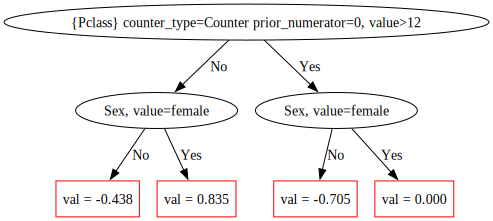

In [15]:
model.plot_tree(tree_idx=0, pool=pool)

## After Forcing

In [29]:
import torch
torch.cuda.is_available()

False

In [27]:
model = CatBoostClassifier(**base_params, task_type="GPU", fixed_binary_splits=X.columns.get_loc("Sex")).fit(pool)

CatBoostError: /Users/zomb-ml-platform-msk/go-agent-21.2.0/pipelines/BuildMaster/catboost.git/catboost/libs/train_lib/trainer_env.cpp:9: Environment for task type [GPU] not found